# **Speech Emotion Recognition (SER)**


### Data 606 Capstone Project
- Project name : Speech Emotion Recognition (SER)
- Github : https://github.com/DATA-606-2023-FALL-THURSDAY/Narava_Pranay
- Author: Pranay manikanta Narava


**Speech Emotion Recognition:** I am excited to explore the fascinating topic of Speech Emotions Recognition. This field involves recognizing human emotions and affective states through speech patterns. It is based on the understanding that our voices often convey our underlying emotions through changes in tone, pitch, and other auditory elements. This phenomenon is not exclusive to humans, as animals like dogs and horses can also comprehend human emotions through our speech patterns. By delving into this subject, we can better understand the intricate nature of human communication and the interplay between our emotions and vocal expressions.

**Significance of SER**
- **Growing Popularity:** Emotion recognition has gained significant traction within the broader domain of speech recognition. The demand for SER has risen dramatically, with machine learning methods being employed for emotion identification. This project seeks to push the boundaries further by utilizing deep learning for enhanced emotion recognition.

- **Call Center Applications:** SER finds practical applications in call centers where it can classify calls based on the emotional content. This classification serves as a valuable performance metric for conversational analysis, aiding in identifying customer satisfaction levels, recognizing unsatisfied customers, and offering insights to improve service quality.

- **In-Car Safety Systems:** The project explores potential applications in in-car board systems. By gauging the mental state of the driver through SER, the system can initiate safety measures, contributing to accident prevention. This innovation aligns with the broader goal of enhancing road safety by integrating real-time emotional analysis into vehicular technology.

## Steps:

### Section: 1 (Loading and Cleaning the Data)
> Step - 1: Importing Required Libraries

> Step - 2: Loding the Data From Source

> Step - 3: Extracting Labels from the Data

> Step - 4: Performing  Required EDA operations on the Data

### Section: 2 (Vizualizing)
> Step - 1: Waveform of each Emotion

> Step - 2: Spectogram of each Emotion

### Section: 3 (Feature Extraction)

> Method - 1: **Melspectogram**

> Method - 2: **MFCC**

### Section: 4 (Data Preparation for Modeling)

> Step - 1: Splitting the Data into x_train and y_train

> Step - 2: Extracting the input shape from data for CNN model

### Section: 5 (CNN Modeling)

> Step - 1: Creating CNN Architecture

> Step - 2: Train the Model

> Step - 3: Fit the Test data into the Model and predict the Emotion State of the speech

> Step - 4: Model Accuracy















## Section: 1 (Loading and Cleaning the Data)

### Step - 1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import librosa
import librosa.display
from IPython.display import Audio

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from tensorflow.keras import layers, models
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

### Step - 2: Loding the Data From Source
#### Establishing file path and exploring the Files

**Dataset**: Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
- The project utilizes the Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess) as the primary dataset. This dataset is a comprehensive collection of audio-visual recordings featuring a diverse range of emotional expressions. The richness of emotional data in Ravdess provides a robust foundation for training and evaluating the deep learning model.

In [2]:
Ravdess = "/content/drive/MyDrive/Audio_Speech_Actors_01-24"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

In [4]:
ravdess_directory_list

['Actor_16',
 'Actor_22',
 'Actor_19',
 'Actor_20',
 'Actor_23',
 'Actor_18',
 'Actor_15',
 'Actor_24',
 'Actor_17',
 'Actor_21',
 'Actor_05',
 'Actor_11',
 'Actor_12',
 'Actor_06',
 'Actor_14',
 'Actor_08',
 'Actor_09',
 'Actor_13',
 'Actor_10',
 'Actor_07',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_01']

In [5]:
file_emotion = []
file_path = []
part_filename_list=[]

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess+ '/' + dir)
    for file in actor:
        part_filename = file.split('.')[0]
        file_path.append(Ravdess + '/' + dir + '/' + file)
        part_filename_list.append(part_filename)


In [6]:
emotion_df = pd.DataFrame( part_filename_list, columns=['Filename'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([path_df, emotion_df], axis=1)

In [7]:
Ravdess_df

Path              Filename
0     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-02-02-16
1     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-01-16
2     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-01-02-16
3     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-02-16
4     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-01-02-16
...                                                 ...                   ...
1435  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-02-02-01
1436  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-02-01
1437  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-01-01
1438  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-01-02-01
1439  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-02-01-01

[1440 rows x 2 columns]

### Step - 3: Extracting Labels from the Data

#### **Extracting Labels From the Data**

#### As per the RAVDESS website  the files identified as "03-01-02-01-02-02-16"
- 03 - Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- 01 - Vocal channel (01 = speech, 02 = song).
- 02 - Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- 01 - Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- 02 - Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- 02 - Repetition (01 = 1st repetition, 02 = 2nd repetition).
- 16 - Actor (01 to 24. Odd-numbered actors are male, even-numbered actors are female).

In [8]:
Ravdess_df[['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Actor' ]] = Ravdess_df['Filename'].str.split('-', expand=True)

In [9]:
Ravdess_df

Path              Filename  \
0     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-02-02-16   
1     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-01-16   
2     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-01-02-16   
3     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-02-16   
4     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-01-02-16   
...                                                 ...                   ...   
1435  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-02-02-01   
1436  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-02-01   
1437  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-01-01   
1438  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-01-02-01   
1439  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-02-01-01   

     Modality Vocal_channel Emotion Emotional_intensity Statement Repetition  \
0          03            01      02                  01        02         02   
1          03            01      01                  01        02         01   
2          03            01      01                  01        01         02   
3          03            01      01                  01        02         02   
4          03            01      02                  01        01         02   
...       ...           ...     ...                 ...       ...        ...   
1435       03            01      08                  01        02         02   
1436       03            01      08                  01        01         02   
1437       03            01      08                  01        01         01   
1438       03            01      08                  02        01         02   
1439       03            01      08                  02        02         01   

     Actor  
0       16  
1       16  
2       16  
3       16  
4       16  
...    ...  
1435    01  
1436    01  
1437    01  
1438    01  
1439    01  

[1440 rows x 9 columns]

In [10]:
Ravdess_df[['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Actor' ]] = Ravdess_df[['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Actor']].astype(int)

In [11]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.Modality.replace({1 : 'full-AV', 2 : 'video-only', 3 : 'audio-only'}, inplace=True)
Ravdess_df.Vocal_channel.replace({1 : 'speech', 2 : 'song'}, inplace=True)
Ravdess_df.Emotional_intensity.replace({1 : ' normal', 2 : 'strong'}, inplace=True)
Ravdess_df.Statement.replace({1 : 'Kids are talking by the door', 2 : 'Dogs are sitting by the door'}, inplace=True)
Ravdess_df.Repetition.replace({1 : '1st repetition', 2 : '2nd repetition'}, inplace=True)



Ravdess_df.head()

Path              Filename  \
0  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-02-02-16   
1  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-01-16   
2  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-01-02-16   
3  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-02-16   
4  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-01-02-16   

     Modality Vocal_channel  Emotion Emotional_intensity  \
0  audio-only        speech     calm              normal   
1  audio-only        speech  neutral              normal   
2  audio-only        speech  neutral              normal   
3  audio-only        speech  neutral              normal   
4  audio-only        speech     calm              normal   

                      Statement      Repetition  Actor  
0  Dogs are sitting by the door  2nd repetition     16  
1  Dogs are sitting by the door  1st repetition     16  
2  Kids are talking by the door  2nd repetition     16  
3  Dogs are sitting by the door  2nd repetition     16  
4  Kids are talking by the door  2nd repetition     16

In [12]:
Ravdess_df.Modality.unique()

array(['audio-only'], dtype=object)

In [13]:
Ravdess_df.Vocal_channel.unique()

array(['speech'], dtype=object)

### Step - 4: Performing Required EDA operations on the Data
#### Visulizing the Data

In [14]:
value_counts = Ravdess_df['Emotion'].value_counts().reset_index()
value_counts.columns = ['Category', 'Count']


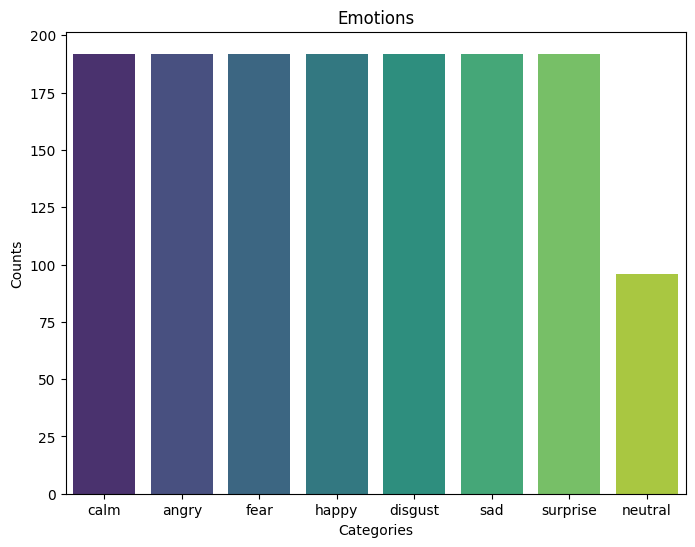

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=value_counts, palette='viridis')
plt.title('Emotions')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [16]:
import plotly.express as px


fig = px.pie(value_counts, values='Count', names='Category', title='Emotions',  color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

#### Emotional_intensity

In [17]:
values = Ravdess_df['Emotional_intensity'].value_counts().reset_index()
values.columns = ['Category', 'Count']

In [18]:
import plotly.express as px


fig = px.pie(values, values='Count', names='Category', title='Emotional_intensity', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(hoverinfo='label+percent', textposition='inside', textinfo='value+label')
fig.show()

#### Statement

In [19]:
Statement_values = Ravdess_df['Statement'].value_counts().reset_index()
Statement_values.columns = ['Category', 'Count']

In [20]:
import plotly.express as px

fig = px.pie(Statement_values, values='Count', names='Category', title='Statement', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(hoverinfo='label+percent', textposition='inside', textinfo='value')
fig.show()

## Section - 2 : (visualizing)
###  visualizing the each emotion of Audio Data in Waveform and Spectogram

In [21]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(7, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [22]:
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(7, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

####  Waveform and Spectogram of emotion **Fear**

Fear


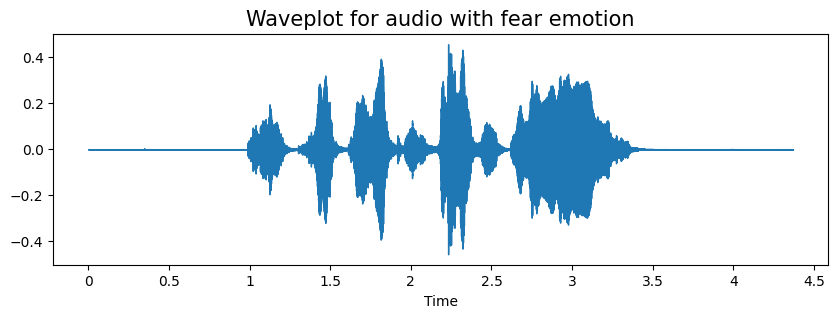

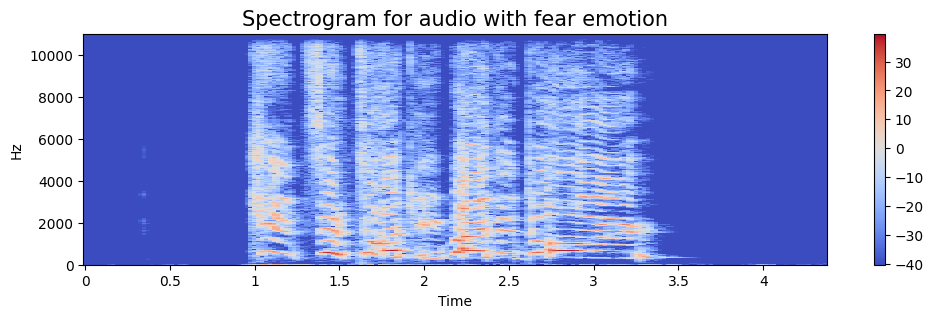

In [23]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
print('Fear')
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

####  Waveform and Spectogram of emotion **Neutral**

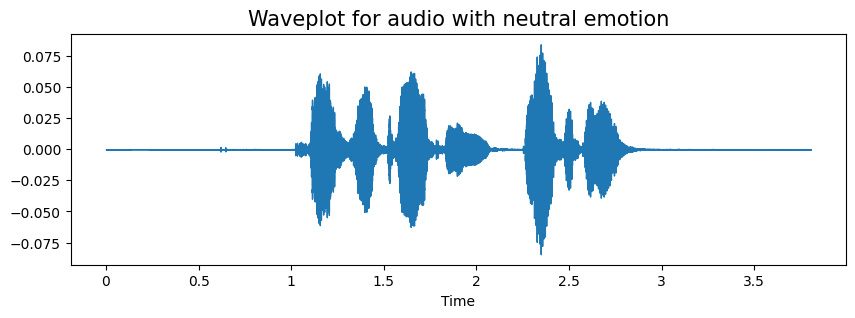

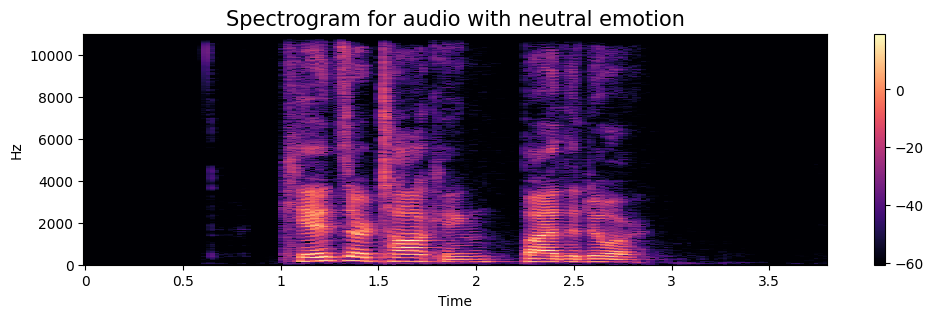

In [24]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Calm**

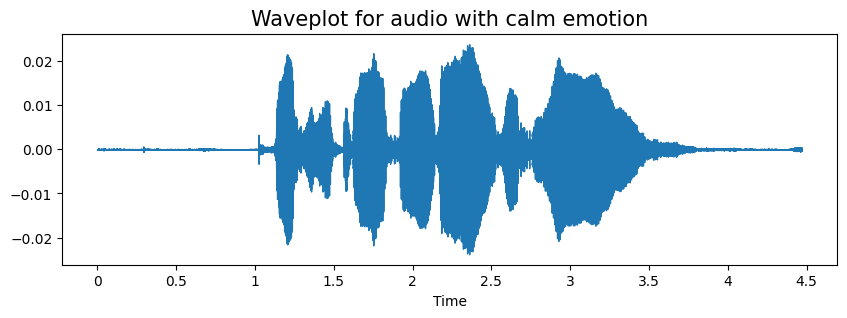

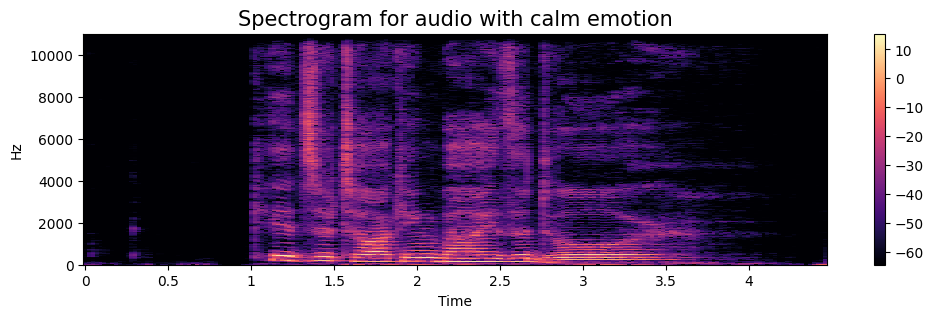

In [25]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Surprise**

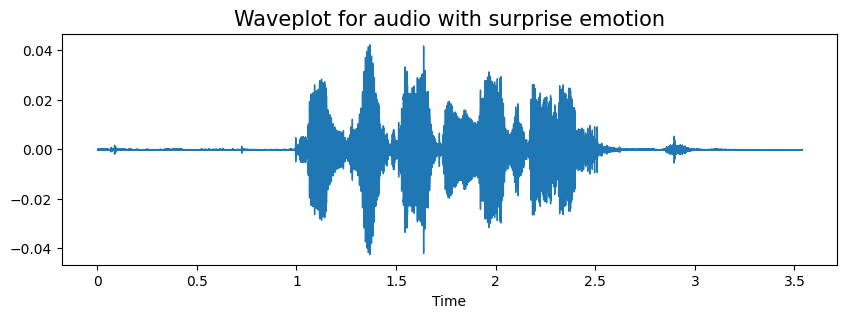

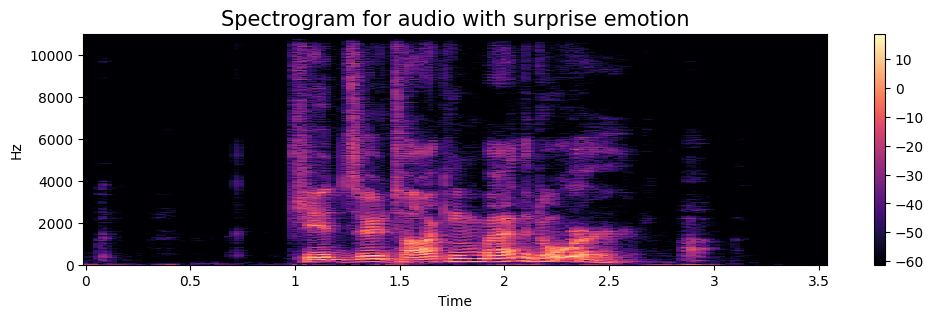

In [26]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Happy**

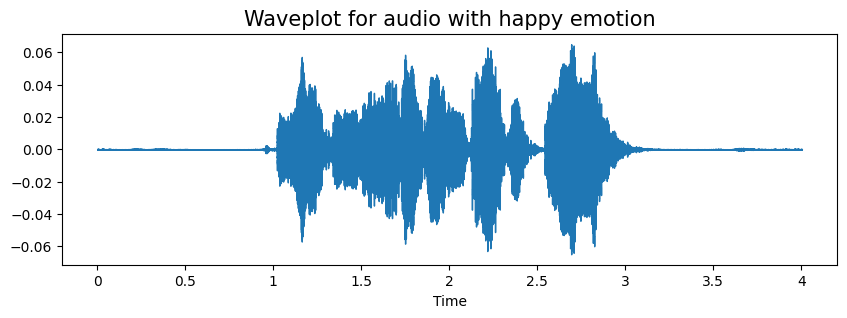

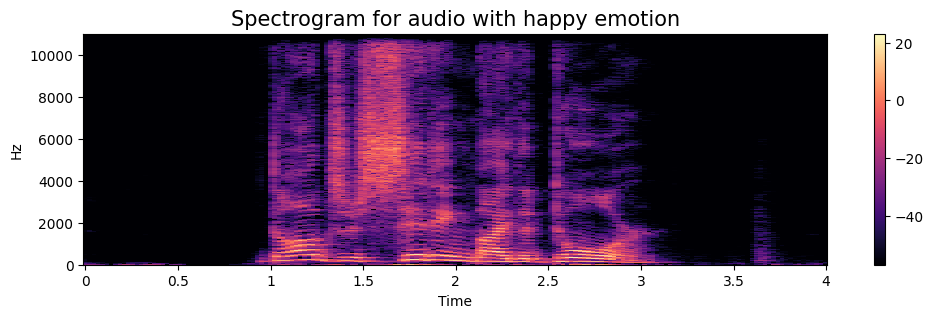

In [27]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Disgust**

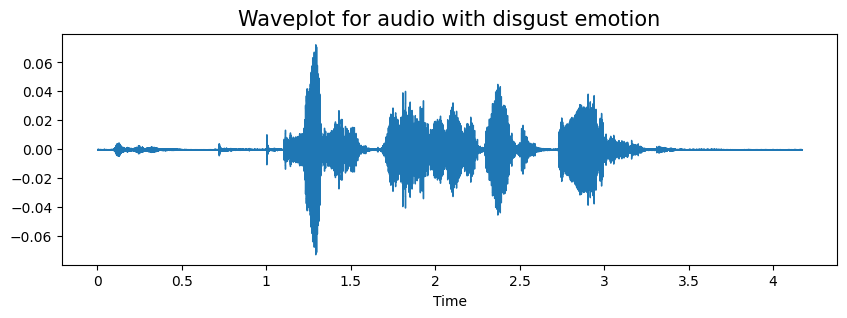

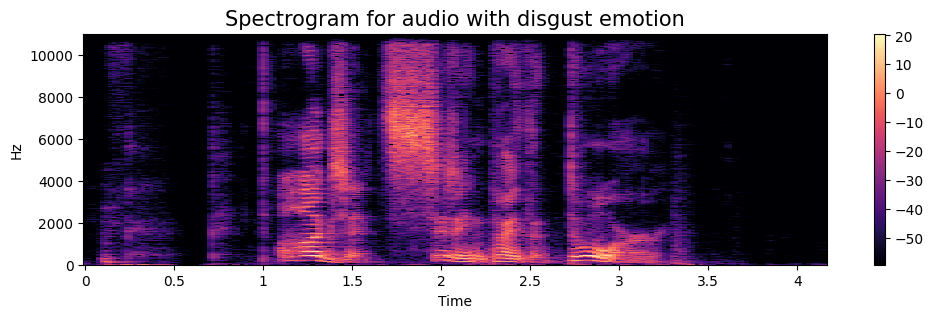

In [28]:
emotion='disgust'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Angry**

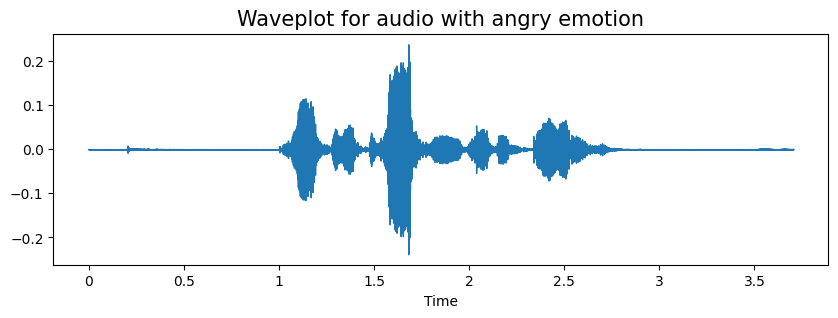

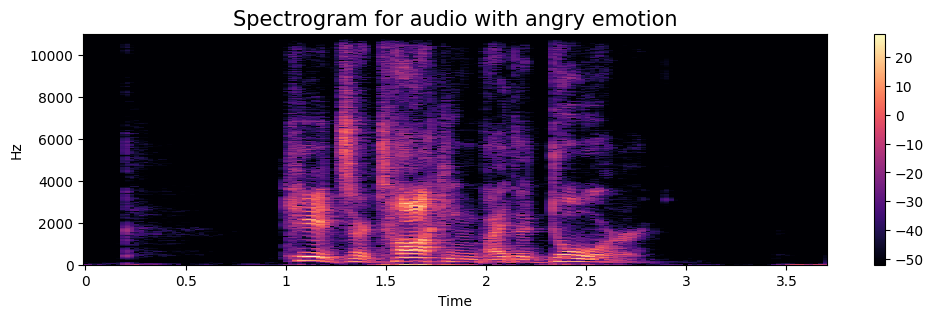

In [29]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#### Waveform and Spectogram of emotion **Sad**

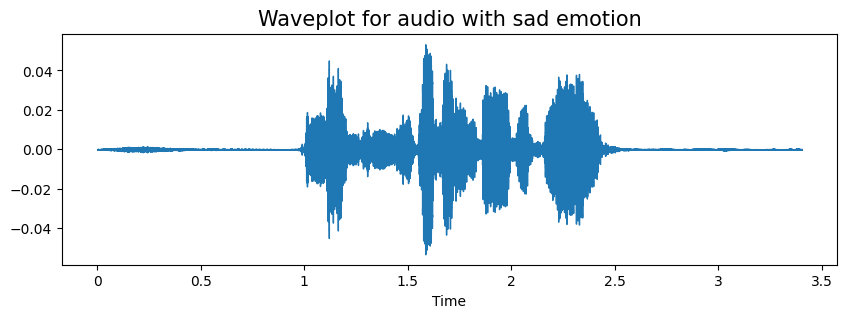

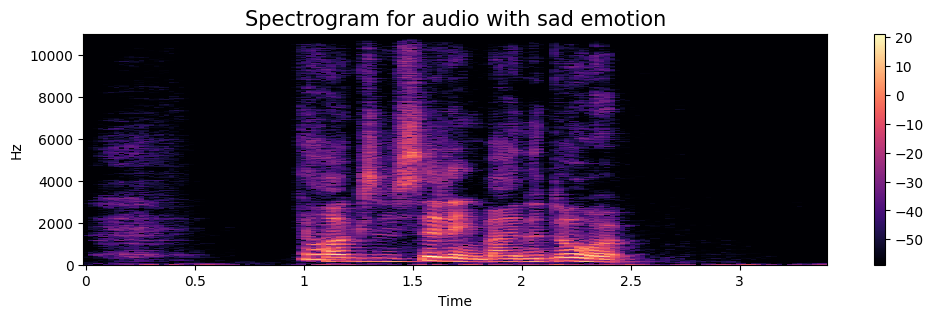

In [30]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotion==emotion])[16]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Section - 3: (Feature Extraction)

### Why we need Spectogram ?
Spectrograms offer a powerful representation of the data. It plots over the time, for a given range of frequencies, the power (dB) of a signal. This allows us to spot periodic patterns over time, and regions of activity.

- Representation of Time-Frequency Characteristics: Spectrograms provide a way to represent how the frequency content of a signal changes over time. In many real-world applications, such as speech recognition or music classification, the time-frequency characteristics of the data contain important information. A spectrogram visually displays this information, making it easier for machine learning models to capture patterns.

- Dimensionality Reduction: Raw audio data can be high-dimensional, making it challenging to work with directly in machine learning models. Spectrograms reduce the dimensionality of the data by breaking it into smaller time windows and representing the frequency content within each window. This reduction in dimensionality makes it more computationally feasible to train models.

In [31]:
Ravdess_df

Path              Filename  \
0     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-02-02-16   
1     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-01-16   
2     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-01-02-16   
3     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-01-01-02-02-16   
4     /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-02-01-01-02-16   
...                                                 ...                   ...   
1435  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-02-02-01   
1436  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-02-01   
1437  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-01-01-01-01   
1438  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-01-02-01   
1439  /content/drive/MyDrive/Audio_Speech_Actors_01-...  03-01-08-02-02-01-01   

        Modality Vocal_channel   Emotion Emotional_intensity  \
0     audio-only        speech      calm              normal   
1     audio-only        speech   neutral              normal   
2     audio-only        speech   neutral              normal   
3     audio-only        speech   neutral              normal   
4     audio-only        speech      calm              normal   
...          ...           ...       ...                 ...   
1435  audio-only        speech  surprise              normal   
1436  audio-only        speech  surprise              normal   
1437  audio-only        speech  surprise              normal   
1438  audio-only        speech  surprise              strong   
1439  audio-only        speech  surprise              strong   

                         Statement      Repetition  Actor  
0     Dogs are sitting by the door  2nd repetition     16  
1     Dogs are sitting by the door  1st repetition     16  
2     Kids are talking by the door  2nd repetition     16  
3     Dogs are sitting by the door  2nd repetition     16  
4     Kids are talking by the door  2nd repetition     16  
...                            ...             ...    ...  
1435  Dogs are sitting by the door  2nd repetition      1  
1436  Kids are talking by the door  2nd repetition      1  
1437  Kids are talking by the door  1st repetition      1  
1438  Kids are talking by the door  2nd repetition      1  
1439  Dogs are sitting by the door  1st repetition      1  

[1440 rows x 9 columns]

### **Feature Extraction:**


Feature extraction plays a pivotal role in preparing audio data for machine learning models. In the realm of audio signal processing, Mel Spectrogram and Mel Frequency Cepstral Coefficients (MFCC) are popular techniques for representing the distinctive features of audio signals.

### Method - 1

**Mel_Spectrogram Features**

Definition:

A Mel Spectrogram is a visual representation of the spectrum of frequencies in an audio signal over time. It is derived from the traditional spectrogram but with frequency bins transformed to the mel scale.

In [32]:
processed_data = []
mel = np.array([])


path = np.array(Ravdess_df.Path)

for i in path:

  data, sampling_rate = librosa.load(i, sr = None)

  # Extracting Mel_spectrogram features
  mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

  # Converting Mel_spectrogram to decibel scale (log-scale)
  db_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  processed_data.append({
      'Audio' : data,
      'Sampling_rate' : sampling_rate,
      'mel_spectrogram': mel_spectrogram,
      'mel_spectrogram_db': db_mel_spectrogram
      })
  mel = db_mel_spectrogram



In [33]:
Features = pd.DataFrame(processed_data)
Features['Emotions'] = Ravdess_df['Emotion']
Features

Audio  Sampling_rate  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
...                                                 ...            ...   
1435  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1436  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1437  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1438  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1439  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   

                                        mel_spectrogram  \
0     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                 ...   
1435  [[7.015315e-10, 1.5952288e-09, 1.8883721e-09, ...   
1436  [[8.518993e-09, 2.5371381e-08, 1.3524229e-08, ...   
1437  [[3.19208e-10, 1.0247454e-09, 1.7340619e-09, 6...   
1438  [[0.0, 9.491304e-12, 1.2844215e-10, 8.189301e-...   
1439  [[2.0925761e-09, 6.1995467e-09, 1.4882244e-09,...   

                                     mel_spectrogram_db  Emotions  
0     [[-71.58081, -71.58081, -71.58081, -71.58081, ...      calm  
1     [[-72.43278, -72.43278, -72.43278, -72.43278, ...   neutral  
2     [[-75.248604, -75.248604, -75.248604, -75.2486...   neutral  
3     [[-70.19898, -70.19898, -70.19898, -70.19898, ...   neutral  
4     [[-72.17378, -72.17378, -72.17378, -72.17378, ...      calm  
...                                                 ...       ...  
1435  [[-75.11203, -75.11203, -75.11203, -75.11203, ...  surprise  
1436  [[-74.00225, -74.00225, -74.00225, -74.00225, ...  surprise  
1437  [[-70.83033, -70.83033, -70.83033, -70.83033, ...  surprise  
1438  [[-64.842384, -64.842384, -64.842384, -64.8423...  surprise  
1439  [[-71.03568, -71.03568, -71.03568, -71.03568, ...  surprise  

[1440 rows x 5 columns]

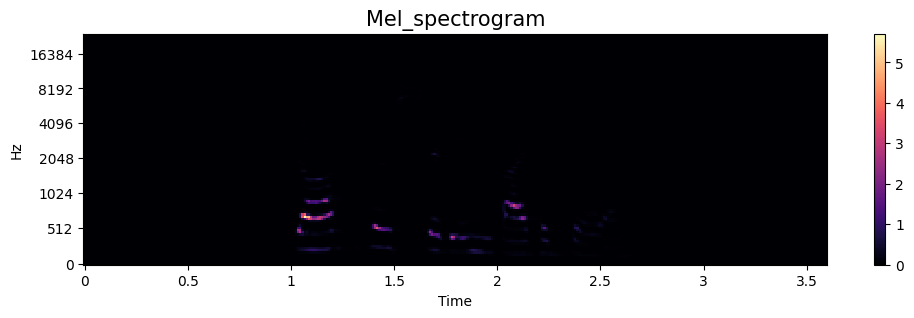

In [34]:
plt.figure(figsize=(12, 3))
plt.title('Mel_spectrogram', size=15)
librosa.display.specshow(Features.mel_spectrogram[1], sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

It's because most sounds humans hear are concentrated in very small frequency and amplitude ranges.

#### **Log of Mel_spectrogram**

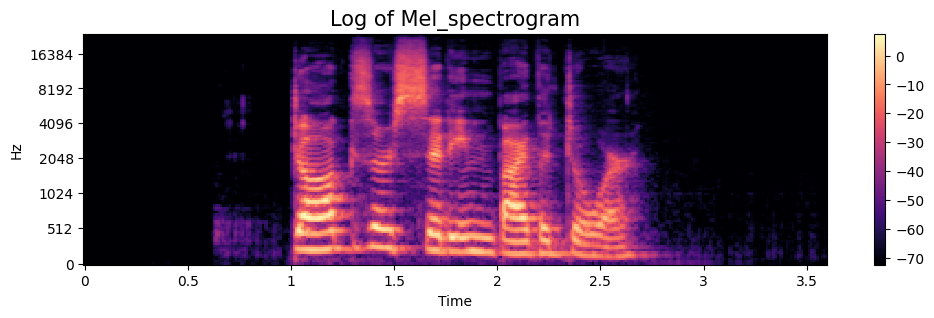

In [35]:
plt.figure(figsize=(12, 3))
plt.title('Log of Mel_spectrogram', size=15)
librosa.display.specshow(Features.mel_spectrogram_db[1], sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

### Method - 2
**Extracting MFCC Features**

Definition:

MFCCs are coefficients representing the short-term power spectrum of an audio signal. They are widely used in speech and audio processing due to their effectiveness in capturing essential characteristics.

MFCCs are derived from the mel-spectrogram. They capture the temporal variation in the spectral content of an audio signal. MFCCs are coefficients obtained from the discrete cosine transform (DCT) of the log mel-spectrogram.



In [36]:
processed_data = []


path = np.array(Ravdess_df.Path)

for i in path:

  data, sampling_rate = librosa.load(i, sr = None)

  # Extracting Mel_spectrogram features
  MFCC = librosa.feature.mfcc(y=data, sr=sampling_rate)

  # Converting Mel_spectrogram to decibel scale (log-scale)
  db_MFCC = librosa.amplitude_to_db(MFCC)
  processed_data.append({
      'Audio' : data,
      'Sampling_rate' : sampling_rate,
      'MFCC': MFCC,
      'db_MFCC': db_MFCC
      })


In [37]:
MFCC_Features = pd.DataFrame(processed_data)
MFCC_Features['Emotions'] = Ravdess_df['Emotion']
MFCC_Features

Audio  Sampling_rate  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
...                                                 ...            ...   
1435  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1436  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1437  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1438  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   
1439  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          48000   

                                                   MFCC  \
0     [[-809.8444, -809.8444, -809.8444, -809.8444, ...   
1     [[-819.48334, -819.48334, -819.48334, -819.483...   
2     [[-851.34076, -851.34076, -851.34076, -851.340...   
3     [[-794.2108, -794.2108, -794.2108, -794.2108, ...   
4     [[-816.5531, -816.5531, -816.5531, -816.5531, ...   
...                                                 ...   
1435  [[-849.7956, -849.7956, -849.7956, -849.7956, ...   
1436  [[-837.23987, -837.21564, -837.23987, -837.239...   
1437  [[-801.3537, -801.3537, -801.3537, -801.3537, ...   
1438  [[-733.60785, -733.60785, -733.60785, -733.607...   
1439  [[-803.677, -803.677, -803.677, -803.677, -803...   

                                                db_MFCC  Emotions  
0     [[58.16803, 58.16803, 58.16803, 58.16803, 58.1...      calm  
1     [[58.2708, 58.2708, 58.2708, 58.2708, 58.2708,...   neutral  
2     [[58.60207, 58.60207, 58.60207, 58.60207, 58.6...   neutral  
3     [[57.998714, 57.998714, 57.998714, 57.998714, ...   neutral  
4     [[58.23969, 58.23969, 58.23969, 58.23969, 58.2...      calm  
...                                                 ...       ...  
1435  [[58.58629, 58.58629, 58.58629, 58.58629, 58.5...  surprise  
1436  [[58.456997, 58.456745, 58.456997, 58.456997, ...  surprise  
1437  [[58.076485, 58.076485, 58.076485, 58.076485, ...  surprise  
1438  [[57.30928, 57.30928, 57.30928, 57.30928, 57.3...  surprise  
1439  [[58.10163, 58.10163, 58.10163, 58.10163, 58.1...  surprise  

[1440 rows x 5 columns]

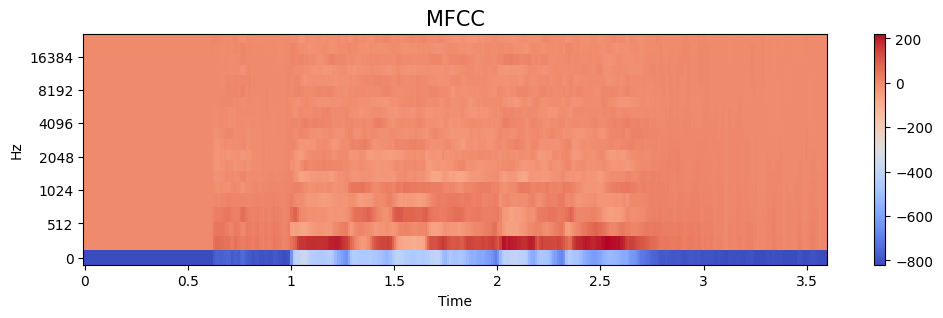

In [38]:
plt.figure(figsize=(12, 3))
plt.title('MFCC', size=15)
librosa.display.specshow(MFCC_Features.MFCC[1], sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

#### **Log of MFCC**

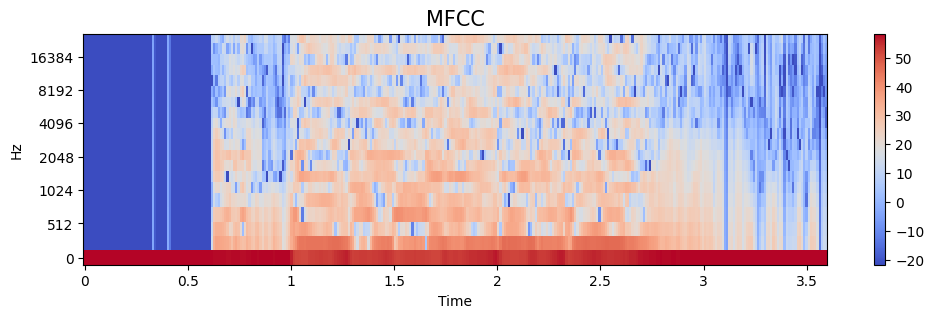

In [39]:
plt.figure(figsize=(12, 3))
plt.title('MFCC', size=15)
librosa.display.specshow(MFCC_Features.db_MFCC[1], sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

## Section - 4: (Data Preparation for Modeling)

### Step - 1: Splitting the Data into x_train and y_train
### Step - 2: Extracting the input shape from data for CNN model

In [40]:
X = Features.mel_spectrogram_db
Y = Features['Emotions']

In [41]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [42]:
mel_spectrograms = [np.array(spec) for spec in Features.mel_spectrogram_db]
max_sequence_length = max(len(spec) for spec in mel_spectrograms)
max_sequence_length

128

In [43]:
num_time_frames_list =[]

mel_spectrogram_sequences = Features.mel_spectrogram_db
for spec in mel_spectrogram_sequences:
    num_time_frames = spec.shape[1]
    num_time_frames_list.append(num_time_frames)

max_width = max(num_time_frames_list)
max_width

495

In [44]:
x = np.zeros((len(mel_spectrogram_sequences), max_sequence_length, max_width))
for i, spec in enumerate(mel_spectrogram_sequences):
    x[i, :max_sequence_length, :spec.shape[1]] = spec

In [45]:
# x_train, x_val, y_train, y_val = train_test_split(x, Y, random_state=7)
# x_train.shape, y_train.shape, x_val.shape, y_val.shape

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state=7)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 128, 495), (1080, 8), (360, 128, 495), (360, 8))

In [47]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print('Reshape:', x_train.shape, x_test.shape)

Reshape: (1080, 128, 495, 1) (360, 128, 495, 1)


In [48]:
input_shape = x_train.shape[1:]
print('Input Shape for CNN model is :', input_shape)


Input Shape for CNN model is : (128, 495, 1)


## Section - 5: (**Convolutional Neural Network (CNN)**)

### Step - 1: Creating CNN Architecture

**Overview**:
- Convolutional Neural Networks (CNNs) are a class of deep neural networks designed for tasks involving images, such as image classification, object detection, and segmentation. CNNs are particularly effective in capturing spatial hierarchies and patterns in data. In addition to image data, CNNs can also be adapted for processing audio data. While the basic architecture remains similar, there are specific considerations for handling audio signals.



**Architecture:**
- A typical CNN architecture consists of several layers that work together to process input data, learn features, and make predictions. The basic layers include:

  - Input Layer
  - 1D Convolutional  Layer
  - Pooling Layers
  - Leaky Relu
  - Max pooling
  - Drop out Layer
  - Flatten Layer
  - Dense Layer
  - Output Layer

In [49]:
# input_shape = x_train.shape[1:]
input_shape

(128, 495, 1)

In [50]:
from keras import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
import tensorflow as tf
K.clear_session()

In [51]:
model = models.Sequential()
model.add(Conv2D(64, [7,11], strides = [2,2], padding = 'SAME', input_shape = input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))
model.add(layers.Dropout(0.2))

model.add(Conv2D(128, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))
model.add(layers.Dropout(0.2))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))
model.add(layers.Dropout(0.2))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(layers.Dropout(0.2))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(layers.Dropout(0.2))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME'))
model.add(layers.Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu'))
model.add(Dense(8, activation = 'sigmoid'))

opt = optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model.compile(optimizer =  opt , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_train.shape

(1080, 8)

In [54]:
y_test.shape

(360, 8)

### Step - 2: Train the CNN model

In [55]:
history = model.fit(x_train, y_train, epochs=52,  validation_data=(x_test, y_test))

Epoch 1/52
34/34 [==============================] - 15s 203ms/step - loss: 0.6927 - accuracy: 0.1509 - val_loss: 0.5566 - val_accuracy: 0.2250
Epoch 2/52
34/34 [==============================] - 4s 107ms/step - loss: 0.3716 - accuracy: 0.1972 - val_loss: 0.5507 - val_accuracy: 0.2639
Epoch 3/52
34/34 [==============================] - 4s 105ms/step - loss: 0.3573 - accuracy: 0.2444 - val_loss: 0.4987 - val_accuracy: 0.2833
Epoch 4/52
34/34 [==============================] - 4s 117ms/step - loss: 0.3397 - accuracy: 0.2880 - val_loss: 0.4739 - val_accuracy: 0.2972
Epoch 5/52
34/34 [==============================] - 4s 117ms/step - loss: 0.3296 - accuracy: 0.3148 - val_loss: 0.4636 - val_accuracy: 0.3250
Epoch 6/52
34/34 [==============================] - 4s 106ms/step - loss: 0.3233 - accuracy: 0.3333 - val_loss: 0.4723 - val_accuracy: 0.3222
Epoch 7/52
34/34 [==============================] - 4s 115ms/step - loss: 0.3167 - accuracy: 0.3444 - val_loss: 0.4309 - val_accuracy: 0.3250
Epoch

### Step - 3: Fit the test data into the Trainned model
### Step - 4: Model Accuracy

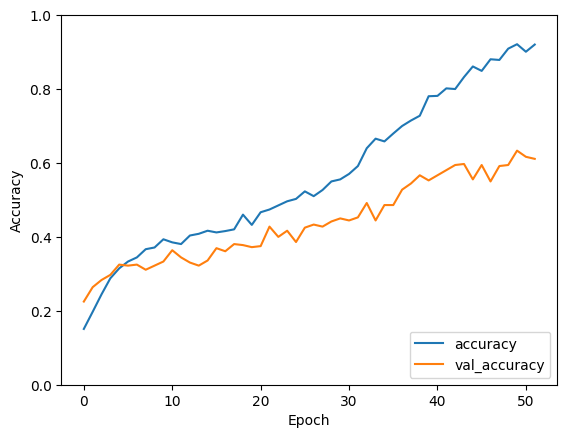

In [56]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


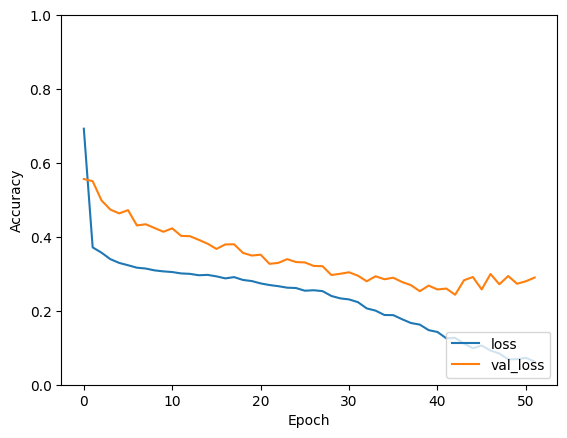

In [57]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [58]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train_Accuracy: ', train_acc, 'Train_Loss: ',train_loss)

34/34 - 1s - loss: 0.0265 - accuracy: 0.9917 - 1s/epoch - 34ms/step
Train_Accuracy:  0.9916666746139526 Train_Loss:  0.026485702022910118


In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test  , verbose=2)
print('Test_Accuracy: ', test_acc, 'Test_Loss: ',test_loss)

12/12 - 0s - loss: 0.2900 - accuracy: 0.6111 - 340ms/epoch - 28ms/step
Test_Accuracy:  0.6111111044883728 Test_Loss:  0.29002323746681213


In [60]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

12/12 [==============================] - 1s 25ms/step


In [61]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0         surprise      surprise
1              sad          fear
2         surprise      surprise
3         surprise         happy
4         surprise      surprise
5         surprise          fear
6            happy         happy
7            angry         angry
8              sad         happy
9          disgust       disgust

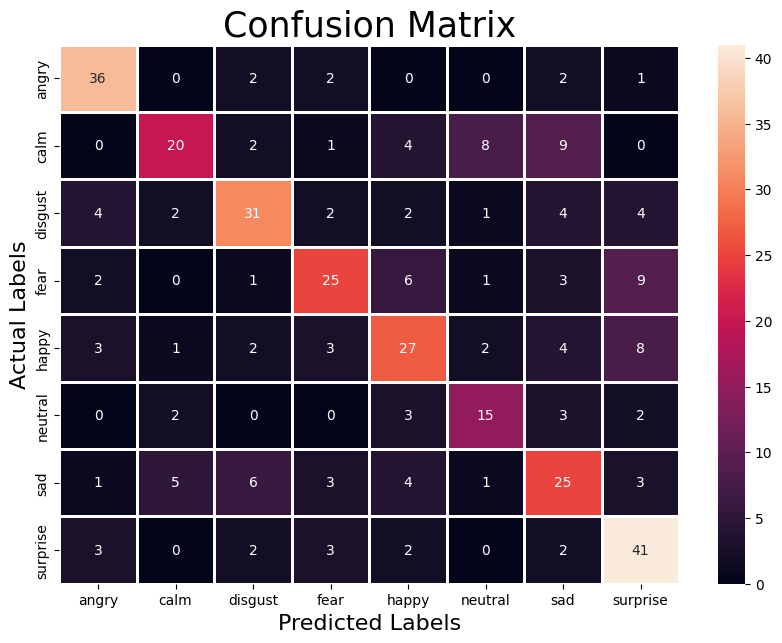

In [62]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Labels', size=16)
plt.ylabel('Actual Labels', size=16)
plt.show()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.73      0.84      0.78        43
        calm       0.67      0.45      0.54        44
     disgust       0.67      0.62      0.65        50
        fear       0.64      0.53      0.58        47
       happy       0.56      0.54      0.55        50
     neutral       0.54      0.60      0.57        25
         sad       0.48      0.52      0.50        48
    surprise       0.60      0.77      0.68        53

    accuracy                           0.61       360
   macro avg       0.61      0.61      0.61       360
weighted avg       0.61      0.61      0.61       360



## Report:


**1. Overview:**  

The presented CNN model for Speech emotion recognition demonstrates a commendable effort in capturing emotional cues from audio data. However, the model faces challenges in achieving higher accuracy, likely due to limitations in computational resources.

**2. Model Performance:**

The CNN model, trained over 52 epochs, exhibits a progressive improvement in both training and validation accuracy. However, the achieved overall accuracy of 61% suggests room for enhancement. The confusion matrix and classification report reveal varying performance across different emotion classes, with notable strengths in predicting calm and happy emotions, and challenges in discerning neutral and sad emotions.

**3. Challenges and Limitations:**

One significant constraint affecting the model's performance is the lack of dedicated GPU resources. The extended training time and limited parallel processing capabilities on a CPU-only setup hinder the model's ability to converge to a more optimal solution. Given the resource constraints, achieving higher accuracy becomes a challenging task.

**4. Data Size and RAM Limitations:**

The model has been trained on a dataset comprising 1500 audio files. Attempting to expand the dataset beyond 1800 audio files is hampered by the shortage of RAM. The limitation in memory capacity prevents the model from efficiently processing a larger dataset, impacting the generalization ability and potentially hindering its performance on new, unseen data.

**5. Recommendations:**

Considering the resource limitations, several recommendations can be made to improve the model's performance:

  -  GPU Acceleration: Investing in a GPU or utilizing cloud-based GPU resources can significantly accelerate training times and enable the model to explore a broader solution space, potentially leading to improved accuracy.

  -  Memory Management: Implementing memory-efficient techniques, such as data generators and batch processing, can help mitigate RAM limitations when working with larger datasets.

  -  Data Augmentation: Augmenting the existing dataset through techniques like pitch shifting, time stretching, and noise injection can artificially increase the diversity of the training set, potentially enhancing the model's ability to generalize.

**6. Conclusion:**

In conclusion, the presented CNN model shows promise in audio emotion recognition, but achieving higher accuracy is constrained by the lack of GPU resources and RAM limitations. To overcome these challenges, investments in hardware upgrades or cloud computing solutions are recommended. Additionally, optimizing data handling processes and implementing data augmentation strategies can contribute to more robust model training.